# Classification with random forest and decision trees

-- Assignment: Recreate the notebook with a regression example

In [5]:
# import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/josephgitau/Nov-Intake-Notebooks/refs/heads/main/gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
X = df.drop("gender", axis=1)
y = df["gender"]

In [7]:
## Instantiate the model
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lt_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model
dt_model.fit(X, y)
rf_model.fit(X, y)
lt_model.fit(X, y)

# Make predictions
dt_predictions = dt_model.predict(X)
rf_predictions = rf_model.predict(X)
lt_predictions = lt_model.predict(X)

# Evaluate the models   
print("Decision Tree Classifier Report:")
print(classification_report(y, dt_predictions))
print("Random Forest Classifier Report:")
print(classification_report(y, rf_predictions))
print("Logistic Regression Classifier Report:")
print(classification_report(y, lt_predictions))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00      2501
        Male       1.00      1.00      1.00      2500

    accuracy                           1.00      5001
   macro avg       1.00      1.00      1.00      5001
weighted avg       1.00      1.00      1.00      5001

Random Forest Classifier Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00      2501
        Male       1.00      1.00      1.00      2500

    accuracy                           1.00      5001
   macro avg       1.00      1.00      1.00      5001
weighted avg       1.00      1.00      1.00      5001

Logistic Regression Classifier Report:
              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      2501
        Male       0.97      0.97      0.97      2500

    accuracy                           0.97      5001
   macro avg       0.97

In [ ]:
## Randon Forest Feature Importance
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
importances = rf_model.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

Decision Tree Structure:
|--- nose_wide <= 0.50
|   |--- lips_thin <= 0.50
|   |   |--- forehead_width_cm <= 14.40
|   |   |   |--- forehead_height_cm <= 6.55
|   |   |   |   |--- distance_nose_to_lip_long <= 0.50
|   |   |   |   |   |--- forehead_width_cm <= 13.45
|   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |--- forehead_width_cm >  13.45
|   |   |   |   |   |   |--- nose_long <= 0.50
|   |   |   |   |   |   |   |--- forehead_width_cm <= 13.75
|   |   |   |   |   |   |   |   |--- forehead_width_cm <= 13.65
|   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |   |--- forehead_width_cm >  13.65
|   |   |   |   |   |   |   |   |   |--- forehead_height_cm <= 6.05
|   |   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |   |   |--- forehead_height_cm >  6.05
|   |   |   |   |   |   |   |   |   |   |--- forehead_height_cm <= 6.15
|   |   |   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |  

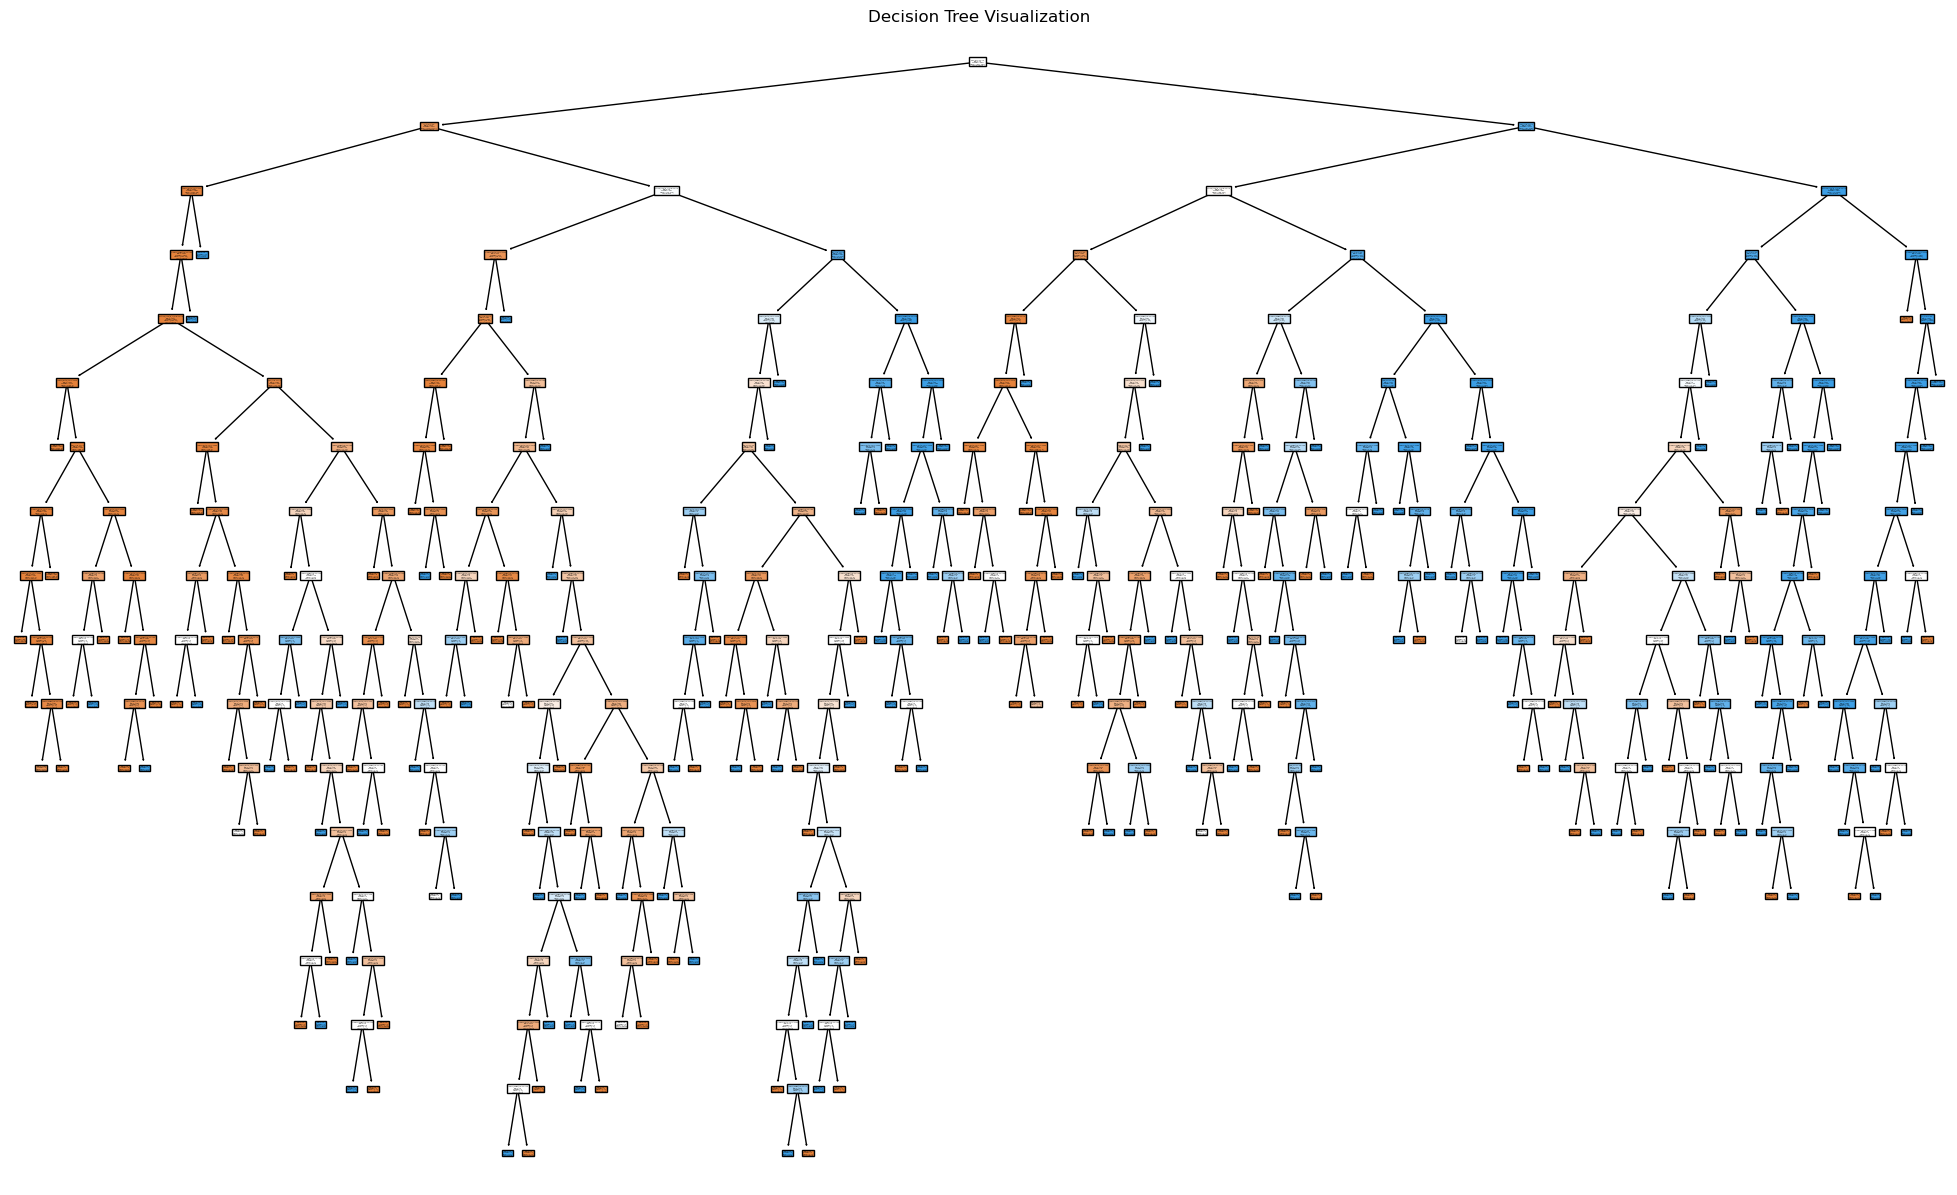

In [ ]:
## Visualize the Decision Tree
from sklearn.tree import export_text

print("Decision Tree Structure:")
print(export_text(dt_model, feature_names=list(X.columns)))

## Create a plot of the Decision Tree


plt.figure(figsize=(25, 15))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()